# Capstone Project Part 1

In this notebook, we will walk through solving a complete machine learning project using a real-world dataset.

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)**

This is a supervised, classification machine learning task: given a set of data with target (in this case the subscription status) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target. 

* Supervised problem: we are given both the features and the target
* Classification problem: the target is a binary categorical variable, taking values: 0 - not subscribed to term deposit and 1 - subscribed to term deposit

During training, we want the model to learn the relationship between the features and the target so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers! 

## Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant: 

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the extent possible
8. Draw conclusions and write a well-documented report

Setting up the structure of the pipeline ahead of time lets us see how one step flows into the other. However, the machine learning pipeline is an iterative procedure and so we don't always follow these steps in a linear fashion.  We may revisit a previous step based on results from further down the pipeline. For example, while we may perform feature selection before building any models, we may use the modeling results to go back and select a different set of features. Or, the modeling may turn up unexpected results that mean we want to explore our data from another angle. Generally, you have to complete one step before moving on to the next, but don't feel like once you have finished one step the first time, you cannot go back and make improvements! 

This notebook will cover the first three (and a half) steps of the pipeline with the other parts discussed in two additional notebooks. Throughout this series, the objective is to show how all the different data science practices come together to form a complete project.

-------

# Bank Marketing Data Set

## Abstract

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

## Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information

### Input variables:
    
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

------

## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
#pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. [Pandas has many methods](http://pandas.pydata.org/pandas-docs/stable/) to help make the data science/machine learning pipeline as smooth as possible.

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('bank-additional-full.csv',sep=';')
# Display the number of rows and columns
print(data.shape)
# Display top of dataframe
data.head(10)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Data consists of 41,188 rows and 21 columns out of which 'y' is the target column describing whether the client has subscribed a term deposit? (binary: 'yes','no')

In [3]:
# Categorical features:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [4]:
# Numerical features:
num_cols=data.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

## Data Cleaning

The `dataframe.info` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as `"unknown"` rather than as `np.nan` (not a number). This means the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [5]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Replacing invalid entries ('unknown') to NaN:

We replace the `'unknown'` entries with `np.nan` which would be filled by identifying pattern within the data.

In [6]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'unknown': np.nan})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
# Statistics for each numerical column
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column:

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 21 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
default,8597,20.9
education,1731,4.2
housing,990,2.4
loan,990,2.4
job,330,0.8
marital,80,0.2


- Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use. 
Since all the above columns have less than 50% missing values, thus we will not remove any columns.

- The missing values will have to be imputed (filled-in) using an appropriate strategy before doing machine learning. 

# Exploratory Data Analysis

[Exploratory Data Analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. 

To begin the EDA, we will focus on a single variable,'y', because this is the target for our machine learning models

### Target Variable:

no     0.887346
yes    0.112654
Name: y, dtype: float64


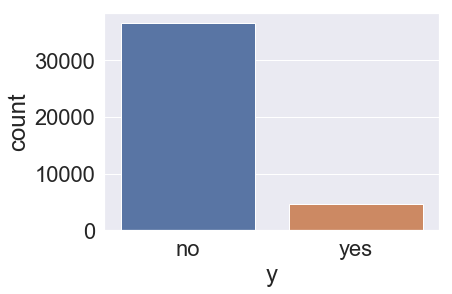

In [11]:
print(data['y'].value_counts(normalize=True))
sns.countplot(data['y']);

- **Imbalanced Data !!!** The target column is highly imbalanced with almost 89% 'no' as the majority class.This might adversely impact our model as it would be biased towards 'no' in comaprison to 'yes'
- We'll have to deal with it using specialized sampling techniques later...

## Insights :

In [12]:
pd.crosstab(index= data['y'], columns= data['job'], normalize= 'columns')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,0.870274,0.931057,0.914835,0.9,0.887825,0.747674,0.895144,0.918619,0.685714,0.89174,0.857988
yes,0.129726,0.068943,0.085165,0.1,0.112175,0.252326,0.104856,0.081381,0.314286,0.10826,0.142012


In [13]:
pd.crosstab(index= data['y'], columns= data['education'], normalize= 'columns')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
y,,,,,,,
no,0.89751,0.917976,0.921754,0.891645,0.777778,0.886515,0.862755
yes,0.10249,0.082024,0.078246,0.108355,0.222222,0.113485,0.137245


In [14]:
pd.crosstab(index= data['y'], columns= data['default'], normalize= 'columns')

default,no,yes
y,,
no,0.87121,1.0
yes,0.12879,0.0


In [15]:
pd.crosstab(index= data['y'], columns= data['campaign'], normalize= 'columns')

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,42,43,56
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.869629,0.88543,0.892529,0.906073,0.924953,0.923391,0.939587,0.9575,0.939929,0.946667,0.932203,0.976,0.956522,0.985507,0.960784,1.0,0.931034,1.0,1.0,1.0,1.0,1.0,0.9375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
yes,0.130371,0.11457,0.107471,0.093927,0.075047,0.076609,0.060413,0.0425,0.060071,0.053333,0.067797,0.024,0.043478,0.014493,0.039216,0.0,0.068966,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pd.crosstab(index= data['y'], columns= data['marital'], normalize= 'columns')

marital,divorced,married,single
y,,,
no,0.896791,0.898427,0.859959
yes,0.103209,0.101573,0.140041


In [17]:
pd.crosstab(index= data['y'], columns= data['poutcome'], normalize= 'columns')

poutcome,failure,nonexistent,success
y,,,
no,0.857714,0.911678,0.348871
yes,0.142286,0.088322,0.651129


## Correlations between Features and Target

Pearson correlation coefficient also referred to as Pearson's r, is a measure of the linear correlation between two variables X and Y. According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. This is a measure of the strength and direction of a linear relationship between two variables.

Although there can be non-linear relationships between the features and targets and correlation coefficients also account for interactions between features, linear relationships are a good way to start exploring trends in the data. We can then use these values for selecting the features to employ in our model.

The code below calculates the correlation coefficients between all the  continuous variables.
Since our target variable is categorical, thus we cannot compute its correlation coefficient.

In [18]:
# Convert the target variable classes into 0s and 1s
data3= data.copy()
data3['y'].replace(['yes','no'],[1,0], inplace=True)

In [19]:
correlations = data3.corr()['y'].sort_values()
print(correlations.head(15), '\n')
print(correlations.tail(15))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64 

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64


- There are not strong correlations between the features and the target. 
- The most negative correlations with the 'y' are 'nr.employed' and 'pdays' i.e. -0.356 and 0.323 respectively.

- The most positive correlations with the 'y' are 'duration'  i.e. 0.40.

- To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between (categorical variables) and the score we will have to one-hot encode these columns.

#### Heatmap: 
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

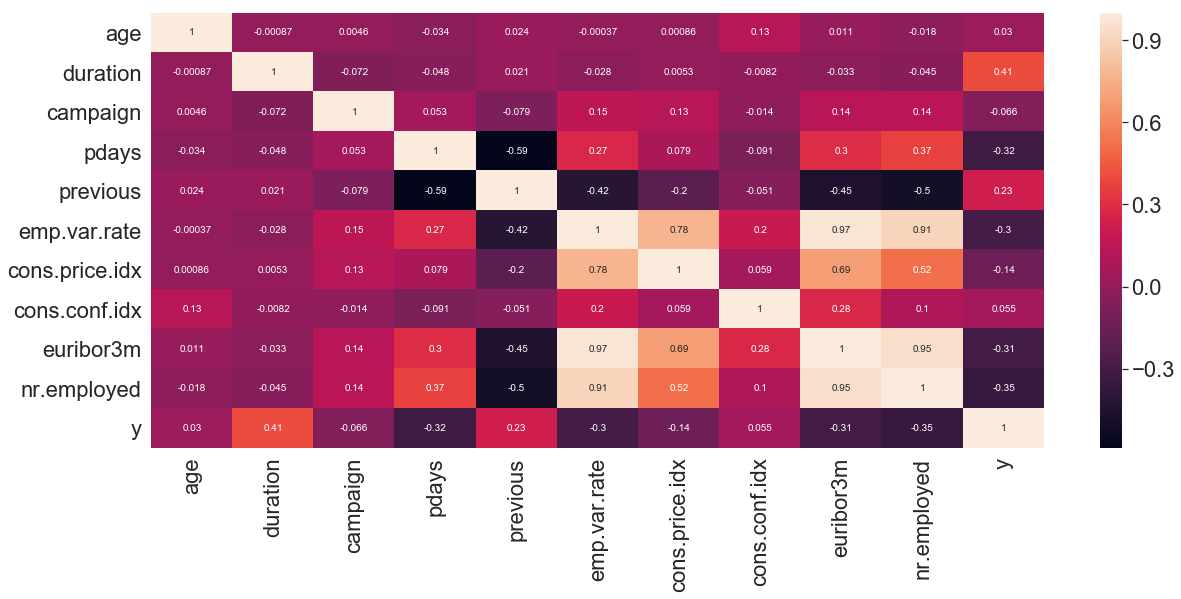

In [20]:
plt.figure(figsize=[20,8])
sns.heatmap(data3.corr(), annot=True)
plt.show()

- By looking at the heatmap we are able to find some features are highy correlated.

- Highly collinear features have a significant correlation coefficent between them.In our dataset, Following features show high multicolinearity:

- column 'euribor3m' and 'emp.var.rate' are highly correlated i.e. 0.97
- column 'euribor3m' and 'nr.employed' are highly correlated i.e. 0.95
- column 'emp.var.rate' and 'cons.pri.idx' are corrrelated i.e. 0.78
- column 'pdays' and 'previous' are correlated i.e. 0.59



## Feature Engineering

Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but we like to think of them as two separate processes:

* __[Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as __adding__ additional features derived from the raw data.


Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models.In particular, we learned the following from EDA which can help us in engineering/selecting features:

* __Age__ is not contributing significantly to term deposit , but intuitively it can be one of the important features. the reason for lack of correlation with target might be due to specificity in age numbers. Let's bin age into different age categories to generalize the data


* __Duration__ last contact duration is mentioned in seconds. Let's convert it into minutes in order to reduce the bandwidth of duration values which would make them more comprehensible.


* __P-Days__ implies number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). This feature can be used to create a new generalized feature- whether the customer was contacted for previous campaign or not ie.,(if pdays=999 then 0 else 1)

Young     11176
Mature    10140
Adult      9999
Old        9873
Name: age_cat, dtype: int64


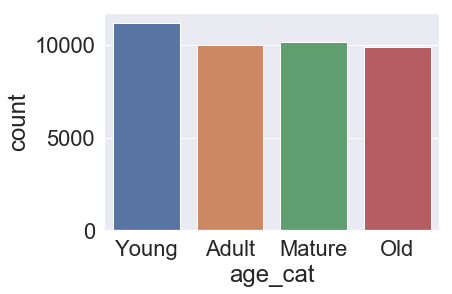

In [21]:
#1. Converting 'age' from a quantitative to qualitative variable (on the basis of quartiles) , to generalize the data
age_bins=[data['age'].min(),data['age'].quantile(0.25),data['age'].quantile(0.5),data['age'].quantile(0.75),data['age'].max()]
age_labels=['Young','Adult','Mature','Old']
data['age_cat']=pd.cut(data['age'],bins=age_bins, labels=age_labels,include_lowest=True)
print(data['age_cat'].value_counts())
sns.countplot(data['age_cat']);

In [22]:
pd.crosstab(index=data.y, columns=data.age_cat, normalize='columns')

age_cat,Young,Adult,Mature,Old
y,,,,
no,0.863278,0.90049,0.921499,0.866201
yes,0.136722,0.09951,0.078501,0.133799


- On the basis of age, `'young'` and `'Old'` customers have higher rate of subscribing to term deposit in comparison to other age groups.

In [23]:
#2. Converting duration into minutes :

data['duration'] = data['duration']/60

In [24]:
#3. pcontact_status_FE: whether the customer was contacted for previous campaign or not
# (0:'not contacted for previous campaign'(pdays=999) ; 1 : contacted for previous campaign(pdays!=999))

data["pdays"] = np.where(data.pdays.isin([999]),0, 1)

## NULL Value Imputation: 

In [25]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
age_cat              0
dtype: int64

### Filling Missing values in 'job':


In [26]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_cat'],
      dtype='object')

- As the official retirement age in portugal is 66 and from the data we can see that most of the people are choosing to retire after the age of 56. So we would impute the unknown jobs for the age of above 56 y/o to retired. 

In [27]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [28]:
# Pattern 1:
data[data['job']=='retired']['age'].describe()

count    1720.000000
mean       62.027326
std        10.493293
min        23.000000
25%        56.000000
50%        59.000000
75%        69.000000
max        98.000000
Name: age, dtype: float64

In [29]:
data.job[data.age>56].value_counts(normalize=True)

retired          0.437920
admin.           0.140078
blue-collar      0.109303
management       0.079943
technician       0.076052
housemaid        0.054828
services         0.032897
self-employed    0.029360
entrepreneur     0.025469
unemployed       0.014149
Name: job, dtype: float64

In [30]:
print('Missing Values before imputation: ',data['job'].isnull().sum())

data.loc[(data['age']>56) & (data['job'].isnull()), 'job'] = 'retired'

print('Missing Values after imputation: ',data['job'].isnull().sum())

Missing Values before imputation:  330
Missing Values after imputation:  279


- On the same lines , job type : 'student' would mostly be for young customers.. Let's investigate: 

In [31]:
# Pattern 2 :
data[data['job']=='student']['age'].describe()

count    875.000000
mean      25.894857
std        4.991334
min       17.000000
25%       22.000000
50%       25.000000
75%       29.000000
max       47.000000
Name: age, dtype: float64

In [32]:
data.job[(data.age<=25)&(data.job.isnull())].shape

(8,)

In [33]:
# Checking mean age :
data.job[data.age<=25].value_counts(normalize=True)

student          0.273824
blue-collar      0.197226
admin.           0.189988
services         0.148372
technician       0.103136
self-employed    0.024125
management       0.022919
unemployed       0.021110
entrepreneur     0.012063
housemaid        0.006634
retired          0.000603
Name: job, dtype: float64

In [34]:
print('Missing Values before imputation: ',data['job'].isnull().sum())

data.loc[(data['age']<=25) & (data['job'].isnull()), 'job'] = 'student'

print('Missing Values after imputation: ',data['job'].isnull().sum())

Missing Values before imputation:  279
Missing Values after imputation:  271


- Our basic intuition says that education and job should be related to each other. This can help us impute NaN's.. let's investigate further:

In [35]:
edu_job=pd.DataFrame(data.groupby('education')['job'].agg(lambda x:x.value_counts(normalize=True).index[0])).reset_index()
edu_job

,education,job
0,basic.4y,blue-collar
1,basic.6y,blue-collar
2,basic.9y,blue-collar
3,high.school,admin.
4,illiterate,blue-collar
5,professional.course,technician
6,university.degree,admin.


In [36]:
print('Missing Values before imputation: ',data['job'].isnull().sum())

for i in range(0,len(edu_job)):
    data.loc[(data['education']==edu_job.loc[i,'education']) & (data['job'].isnull()), 'job']= edu_job.loc[i,'job']
    
print('Missing Values after imputation: ',data['job'].isnull().sum())

Missing Values before imputation:  271
Missing Values after imputation:  101


In [37]:
# Pattern 3 :
# since education for these rows is also null.. thus we'll impute the remaining missing values by maintaining proportion:

print('Missing Values before imputation: ',data['job'].isnull().sum())

jobj = data['job'].value_counts(normalize=True)
job_null = data['job'].isnull()
data.loc[data['job'].isnull(),'job'] = np.random.choice(jobj.index, size=job_null.sum(), p=jobj.values)

print('Missing Values after imputation: ',data['job'].isnull().sum())

Missing Values before imputation:  101
Missing Values after imputation:  0


### Filling Missing values in 'marital':

In [38]:
data['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [39]:
age_marital=pd.DataFrame(data.groupby('age_cat')['marital'].agg(lambda x:x.value_counts(normalize=True).index[0])).reset_index()
age_marital

,age_cat,marital
0,Young,single
1,Adult,married
2,Mature,married
3,Old,married


In [40]:
print('Missing Values before imputation: ',data['marital'].isnull().sum())

for i in range(0,len(age_marital)):
    data.loc[(data['age_cat']==age_marital.loc[i,'age_cat']) & (data['marital'].isnull()), 'marital']= age_marital.loc[i,'marital']
    
print('Missing Values after imputation: ',data['marital'].isnull().sum())

Missing Values before imputation:  80
Missing Values after imputation:  0


### Filling Missing values in 'education':

- Using intuition that education and job are related to each other ... we'll use this pattern to fill missing values

In [41]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [42]:
job_edu=pd.DataFrame(data.groupby('job')['education'].agg(lambda x:x.value_counts(normalize=True).index[0])).reset_index()
job_edu

,job,education
0,admin.,university.degree
1,blue-collar,basic.9y
2,entrepreneur,university.degree
3,housemaid,basic.4y
4,management,university.degree
5,retired,basic.4y
6,self-employed,university.degree
7,services,high.school
8,student,high.school
9,technician,professional.course


In [43]:
print('Missing Values before imputation: ',data['education'].isnull().sum())

for i in range(0,len(job_edu)):
    data.loc[(data['job']==job_edu.loc[i,'job']) & (data['education'].isnull()), 'education']= job_edu.loc[i,'education']
    
print('Missing Values after imputation: ',data['education'].isnull().sum())

Missing Values before imputation:  1731
Missing Values after imputation:  0


### Filling Missing values in 'default':

In [44]:
data['default'].value_counts(normalize=True)

no     0.999908
yes    0.000092
Name: default, dtype: float64

In [45]:
# since default column conatins 99.9 % 'no' .. Thus, we will simply impute missing values with 'no'
print('Missing Values before imputation: ',data['default'].isnull().sum())

data['default']=data['default'].fillna('no')

print('Missing Values after imputation: ',data['default'].isnull().sum())

Missing Values before imputation:  8597
Missing Values after imputation:  0


### Filling Missing values in 'housing':

In [46]:
data['housing'].value_counts(normalize=True)

yes    0.536743
no     0.463257
Name: housing, dtype: float64

In [47]:
# Imputing Null values by proportion
print('Missing Values before imputation: ',data['housing'].isnull().sum())

hous = data['housing'].value_counts(normalize=True)
hous_null = data['housing'].isnull()
data.loc[data['housing'].isnull(),'housing'] = np.random.choice(hous.index, size=hous_null.sum(), p=hous.values)

print('Missing Values after imputation: ',data['housing'].isnull().sum())

Missing Values before imputation:  990
Missing Values after imputation:  0


### Filling Missing values in 'loan':

In [48]:
data['loan'].value_counts(normalize=True)

no     0.844569
yes    0.155431
Name: loan, dtype: float64

In [49]:
# Imputing Null values by proportion
print('Missing Values before imputation: ',data['loan'].isnull().sum())

loanfreq = data['loan'].value_counts(normalize=True)
loanfreq_null = data['loan'].isnull()
data.loc[data['loan'].isnull(),'loan'] = np.random.choice(loanfreq.index, size=loanfreq_null.sum(), p=loanfreq.values)

print('Missing Values after imputation: ',data['loan'].isnull().sum())

Missing Values before imputation:  990
Missing Values after imputation:  0


In [50]:
data.isnull().sum().sum()

0

### Now, our dataset has no null values.

## Feature Selection:
* __[Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__: The process of choosing the most relevant features in our data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the [most variance](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, feature selection can be thought of as __subtracting__ features so we are left with only those that are most important.

For feature selection, we are __using backward feature elimination and statistical tests__ of the features with respect to the target variable.

### 1. Feature Selection: Backward elemination (P-value approach)

In [51]:
# preparing data for statistical model building and feature selection:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_data=data.copy()
le_data['job']=le.fit_transform(le_data['job'])
le_data['marital']=le.fit_transform(le_data['marital'])
le_data['education']=le.fit_transform(le_data['education'])
le_data['default']=le.fit_transform(le_data['default'])
le_data['housing']=le.fit_transform(le_data['housing'])
le_data['loan']=le.fit_transform(le_data['loan'])
le_data['contact']=le.fit_transform(le_data['contact'])
le_data['month']=le.fit_transform(le_data['month'])
le_data['day_of_week']=le.fit_transform(le_data['day_of_week'])
le_data['poutcome']=le.fit_transform(le_data['poutcome'])
le_data['age_cat']=le.fit_transform(le_data['age_cat'])

In [52]:
le_data['y']= le_data['y'].map({'yes':1,'no':0})

In [53]:
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm
df_constant = add_constant(le_data)
df_constant.head()

D:\Python-with-Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_cat
0,1.0,56,3,1,0,0,0,0,1,6,1,4.350000,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
1,1.0,57,7,1,3,0,0,0,1,6,1,2.483333,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
2,1.0,37,7,1,3,0,1,0,1,6,1,3.766667,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,1.0,40,0,1,1,0,0,0,1,6,1,2.516667,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,1.0,56,7,1,3,0,0,1,1,6,1,5.116667,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2


In [54]:
# Statistical Model performance on original data:
model=sm.Logit(le_data['y'],df_constant.drop('y',axis=1))
result=model.fit()
result.summary()

         Current function value: 0.213339
         Iterations: 35


D:\Python-with-Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41166
Method:                           MLE   Df Model:                           21
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                  0.3940
Time:                        17:22:44   Log-Likelihood:                -8787.0
converged:                      False   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7194     19.423     -0.037      0.970     -38.787      37.349
age                0.0055      0.002      2.912      0.004       0.002       0.009
job                0.0087      0.006      1.553      0.121      -0.002       0.020
marital            0.0739      0.037      1.985      0.047       0.001       0.147
education          0.0601      0.010      5.937      0.000       0.040       0.080
default          -17.9331   3.48e+04     -0.001      1.000   -6.82e+04    6.81e+04
housing           -0.0192      0.040     -0.476      0.634      -0.098       0.060
loan              -0.0701      0.056     -1.246      0.213      -0.180       0.040
contact           -0.7066      0.064    -10.987      0.000      -0.833      -0.581
month             -0.1136      0.009    -12.151      0.000      -0.132      -0.095
day_of_week        0.0570      0.015      3.927      0.000       0.029       0.085
duration           0.2747      0.004     63.024      0.000       0.266       0.283
campaign          -0.0333      0.011     -2.913      0.004      -0.056      -0.011
pdays              0.9981      0.157      6.357      0.000       0.690       1.306
previous          -0.0599      0.055     -1.079      0.281      -0.169       0.049
poutcome           0.4613      0.076      6.065      0.000       0.312       0.610
emp.var.rate      -0.9205      0.068    -13.499      0.000      -1.054      -0.787
cons.price.idx     0.6920      0.120      5.763      0.000       0.457       0.927
cons.conf.idx      0.0192      0.007      2.821      0.005       0.006       0.033
euribor3m          0.6569      0.103      6.385      0.000       0.455       0.859
nr.employed       -0.0136      0.002     -7.365      0.000      -0.017      -0.010
age_cat            0.0962      0.018      5.245      0.000       0.060       0.132
==================================================================================
"""

In [55]:
# Backward Feature Elimination: 
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

fetaure_cols=df_constant.drop('y',axis=1).columns
FS_result=back_feature_elem(df_constant,le_data['y'],fetaure_cols)

D:\Python-with-Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [56]:
FS_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41172
Method:                           MLE   Df Model:                           15
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                  0.3938
Time:                        17:22:46   Log-Likelihood:                -8789.8
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0055      0.002      2.909      0.004       0.002       0.009
marital            0.0749      0.037      2.012      0.044       0.002       0.148
education          0.0605      0.010      6.001      0.000       0.041       0.080
contact           -0.7013      0.059    -11.839      0.000      -0.817      -0.585
month             -0.1140      0.008    -13.688      0.000      -0.130      -0.098
day_of_week        0.0565      0.015      3.892      0.000       0.028       0.085
duration           0.2747      0.004     63.099      0.000       0.266       0.283
campaign          -0.0335      0.011     -2.931      0.003      -0.056      -0.011
pdays              0.8613      0.090      9.523      0.000       0.684       1.039
poutcome           0.5192      0.053      9.737      0.000       0.415       0.624
emp.var.rate      -0.9219      0.063    -14.601      0.000      -1.046      -0.798
cons.price.idx     0.6836      0.030     22.749      0.000       0.625       0.742
cons.conf.idx      0.0193      0.004      4.329      0.000       0.011       0.028
euribor3m          0.6605      0.073      9.008      0.000       0.517       0.804
nr.employed       -0.0136      0.001    -22.846      0.000      -0.015      -0.012
age_cat            0.0982      0.018      5.366      0.000       0.062       0.134
==================================================================================
"""

In [57]:
selected_features=list(FS_result.params.index)
cols=selected_features+['y']

Now , we will verify backward feature selection results using Statistical analysis tests as well...

First, we will do the __statsistical test for the categorical features__.

For categorical features, we are doing the __Chi-Square Test__.

### Job Column

#### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of job of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of job of the client on the term deposit subscription.

In [58]:
import scipy.stats as stats
c2= pd.crosstab(data['job'],data['y'])
stats.chi2_contingency(c2)

(987.7910001613477,
 7.975595578517946e-206,
 10,
 array([[9333.10342818, 1184.89657182],
        [8309.99368748, 1055.00631252],
        [1294.63756434,  164.36243566],
        [ 944.13596193,  119.86403807],
        [2599.92327862,  330.07672138],
        [1575.03884627,  199.96115373],
        [1266.24249781,  160.75750219],
        [3529.86170729,  448.13829271],
        [ 786.18840439,   99.81159561],
        [6008.21860736,  762.78139264],
        [ 900.65601632,  114.34398368]]))

__Observation-__ Since, the p-value(2.0346934938942362e-206) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of job__ of the client on the term deposit subscription.

# Age_Cat Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of age category of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of age category of the client on the term deposit subscription.

In [59]:
c1= pd.crosstab(data['age_cat'],data['y'])
stats.chi2_contingency(c1)

(244.5216092905385,
 1.0015466976149268e-52,
 3,
 array([[9916.97698359, 1259.02301641],
        [8872.57094299, 1126.42905701],
        [8997.68670487, 1142.31329513],
        [8760.76536855, 1112.23463145]]))

__Observation-__ Since, the p-value(1.0015466976149268e-52) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of age category__ of the client on the term deposit subscription.

# Education Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of education of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of education of the client on the term deposit subscription.

In [60]:
c3= pd.crosstab(data['education'],data['y'])
stats.chi2_contingency(c3)

(186.3640503152569,
 1.5083970457358837e-37,
 6,
 array([[3.86350374e+03, 4.90496261e+02],
        [2.03379664e+03, 2.58203360e+02],
        [5.78372011e+03, 7.34279887e+02],
        [8.73503234e+03, 1.10896766e+03],
        [1.59722249e+01, 2.02777508e+00],
        [4.85644372e+03, 6.16556279e+02],
        [1.12595312e+04, 1.42946878e+03]]))

__Observation-__ Since, the p-value(2.9700384072345587e-37) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of education__ of the client on the term deposit subscription.

# Default Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of 'credit in default' of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of 'credit in default' of the client on the term deposit subscription.

In [61]:
c4= pd.crosstab(data['default'],data['y'])
stats.chi2_contingency(c4)

(0.08755907942916237,
 0.7673035224267515,
 1,
 array([[3.65453380e+04, 4.63966204e+03],
        [2.66203749e+00, 3.37962513e-01]]))

__Observation-__ Since, the p-value(0.7673035224267515) is more than 0.05, so, we can infer that our __null hypothesis is fail to reject__ and there is __not a significant effect of 'credit in default'__ of the client on the term deposit subscription.

# Housing Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of housing loan of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of housing loan of the client on the term deposit subscription.

In [62]:
c5= pd.crosstab(data['housing'],data['y'])
stats.chi2_contingency(c5)

(3.5185926712724482,
 0.060683955178852056,
 1,
 array([[16907.48742352,  2146.51257648],
        [19640.51257648,  2493.48742352]]))

__Observation-__ Since, the p-value(0.023907188289511487) is slightly less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a very less __significant effect of housing loan__ of the client on the term deposit subscription.

# Loan Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of personal loan of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of personal loan of the client on the term deposit subscription.

In [63]:
c6= pd.crosstab(data['loan'],data['y'])
stats.chi2_contingency(c6)

(1.287571162789614,
 0.2564960373259432,
 1,
 array([[30877.86015344,  3920.13984656],
        [ 5670.13984656,   719.86015344]]))

__Observation-__ Since, the p-value(0.4724657783106523) is more than 0.05, so, we __fail to reject our null hypothesis__ and there is a __no significant effect of personal loan__ of the client on the term deposit subscrition.

# Marital Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of marital status of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of marital status of the client on the term deposit subscription.

In [64]:
c11= pd.crosstab(data['marital'],data['y'])
stats.chi2_contingency(c11)

(123.17077425521249,
 1.7939329408092675e-27,
 2,
 array([[ 4092.4389628 ,   519.5610372 ],
        [22169.44818879,  2814.55181121],
        [10286.1128484 ,  1305.8871516 ]]))

__Observation-__ Since, the p-value(1.7939329408092675e-27) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of marital status__ of the client on the term deposit subscription.

# 'Contact' Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of contact communication type of the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of contact communication type of the client on the term deposit subscription.

In [65]:
c7= pd.crosstab(data['contact'],data['y'])
stats.chi2_contingency(c7)

(862.3183642075705,
 1.5259856523129964e-189,
 1,
 array([[23198.7693503,  2945.2306497],
        [13349.2306497,  1694.7693503]]))

__Observation-__ Since, the p-value(1.5259856523129964e-189) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of type of contact__ of the client on the term deposit subscription.

# Month Column

In [66]:
c8= pd.crosstab(data['month'],data['y'])
stats.chi2_contingency(c8)

(3101.149351411678, 0.0, 9, array([[ 2335.49422162,   296.50577838],
        [ 5482.02253083,   695.97746917],
        [  161.49694086,    20.50305914],
        [ 6365.8189764 ,   808.1810236 ],
        [ 4718.905118  ,   599.094882  ],
        [  484.49082257,    61.50917743],
        [12217.86471788,  1551.13528212],
        [ 3639.00524425,   461.99475575],
        [  637.11430514,    80.88569486],
        [  505.78712246,    64.21287754]]))

__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of last contacted month__ to the client on the term deposit subscription.

# Day of Week Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of last contact day of the week to the client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of last contact day of the week to the client on the term deposit subscription.

In [67]:
c9= pd.crosstab(data['day_of_week'],data['y'])
stats.chi2_contingency(c9)

(26.14493907587197,
 2.9584820052785324e-05,
 4,
 array([[6945.25580266,  881.74419734],
        [7554.8623871 ,  959.1376129 ],
        [7651.58308245,  971.41691755],
        [7178.62775566,  911.37224434],
        [7217.67097213,  916.32902787]]))

__Observation-__ Since, the p-value(2.9584820052785324e-05) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of last contact day of the week__ to the client on the term deposit subscription.

# POutcome Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of outcome of the previous marketing campaign on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of outcome of the previous marketing campaign on the term deposit subscription.

In [68]:
c10= pd.crosstab(data['poutcome'],data['y'])
stats.chi2_contingency(c10)

(4230.5237978319765, 0.0, 2, array([[ 3772.99446441,   479.00553559],
        [31556.67971254,  4006.32028746],
        [ 1218.32582306,   154.67417694]]))

__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of outcome of the previous marketing campaign__ on the term deposit subscription.

Now, we will do the statistical test for __numerical features__.

For numerical features, we are using the __ANOVA Test__.

In [69]:
import statsmodels.api as sms
import scipy.stats as stats
from statsmodels.formula.api import ols

# Age Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of age of the clients on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of age of the clients on the term deposit subscription.

In [70]:
model1 = ols("age ~ y",data = data).fit()
sms.stats.anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,4.133451e+03,4133.450624,38.094659,6.802136e-10
Residual,41186.0,4.468876e+06,108.504727,NaN,NaN


__Observation-__ Since, the p-value(6.802136e-10) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of age__ of the clients on the term deposit subscription..

# Duration Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of last contact duration of the clients on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of last contact duration of the clients on the term deposit subscription.

In [71]:
model2 = ols("duration ~ y",data = data).fit()
sms.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,126325.270579,126325.270579,8094.101634,0.0
Residual,41186.0,642793.089217,15.607077,NaN,NaN


__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of last contact duration__ of the clients on the term deposit subscription..

# Campaign Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of number of contacts performed to a particular client during the campaign  on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of number of contacts performed to a particular client during the campaign on the term deposit subscription.

In [72]:
model3 = ols("campaign ~ y",data = data).fit()
sms.stats.anova_lm(model3)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,1391.562959,1391.562959,182.156673,2.007780e-41
Residual,41186.0,314635.259513,7.639374,NaN,NaN


__Observation-__ Since, the p-value(2.007780e-41) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of number of contacts performed to a particular client during the campaign__ on the term deposit subscription.

# PDays Column

In [73]:
model4 = ols("pdays ~ y",data = data).fit()
sms.stats.anova_lm(model4)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,154.018928,154.018928,4859.909473,0.0
Residual,41186.0,1305.255497,0.031692,NaN,NaN


__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of number of days that passed by after the client was last contacted from a previous campaign__ on the term deposit subscription..

# Previous Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of number of contacts performed before this campaign for a particular client on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of number of contacts performed before this campaign for a particular client  on the term deposit subscription.

In [74]:
model5 = ols("previous ~ y",data = data).fit()
sms.stats.anova_lm(model5)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,534.485490,534.485490,2304.257088,0.0
Residual,41186.0,9553.326106,0.231956,NaN,NaN


__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of number of contacts performed before this campaign for a particular client__ on the term deposit subscription.

In [75]:
data2=data.rename(index=str,columns={'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx',
       'cons.conf.idx':'cons_conf_idx', 'nr.employed':'nr_employed'})

# 'emp.var.rate' Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of employment variation rate on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of employment variation rate on the term deposit subscription.

In [76]:
model6 = ols("emp_var_rate ~ y",data = data2).fit()
sms.stats.anova_lm(model6)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,9046.842163,9046.842163,4023.829925,0.0
Residual,41186.0,92599.152609,2.248316,NaN,NaN


__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of employment variation rate__ on the term deposit subscription.

# 'cons.price.idx' Column

In [77]:
model7 = ols("cons_price_idx ~ y",data = data2).fit()
sms.stats.anova_lm(model7)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,256.037173,256.037173,778.589786,9.318965e-170
Residual,41186.0,13543.906156,0.328847,NaN,NaN


__Observation-__ Since, the p-value(9.318965e-170) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of consumer price index__ on the term deposit subscription.

# 'cons.conf.idx' Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of consumer confidence index on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of consumer confidence index on the term deposit subscription.

In [78]:
model8 = ols("cons_conf_idx ~ y",data = data2).fit()
sms.stats.anova_lm(model8)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,2656.927416,2656.927416,124.409975,7.536665e-29
Residual,41186.0,879577.484094,21.356225,NaN,NaN


__Observation-__ Since, the p-value(7.536665e-29) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of consumer confidence index__ on the term deposit subscription.

# 'euribor3m' Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of euribor 3 month rate on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of euribor 3 month rate on the term deposit subscription.

In [79]:
model9 = ols("euribor3m ~ y",data = data).fit()
sms.stats.anova_lm(model9)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,11736.509666,11736.509666,4309.479048,0.0
Residual,41186.0,112166.663700,2.723417,NaN,NaN


__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of euribor 3 month rate__ on the term deposit subscription.

# 'nr.employed' Column

### Define null and Alternate Hypothesis
__Null Hypothesis: H0:__ There is no effect of number of employees on the term deposit subscription.

__Alternate Hypothesis: H1:__ There is an effect of number of employees on the term deposit subscription.

In [80]:
model10 = ols("nr_employed ~ y",data = data2).fit()
sms.stats.anova_lm(model10)

,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,2.704727e+07,2.704727e+07,5926.610646,0.0
Residual,41186.0,1.879605e+08,4.563700e+03,NaN,NaN


__Observation-__ Since, the p-value(0.0) is less than 0.05, so, we can infer that our __null hypothesis is rejected__ and there is a __significant effect of number of employees__ on the term deposit subscription.

# Summary of Statistical Tests

## Except 'default' and 'loan' column, other features have a significant impact on the target variable.

### Now, we will select the only significant features and then check the base model accuracy

In [81]:
#mdata=data.drop(['loan','default','age_cat'],axis=1)
# selecting the fetaures from backward eleimation and statistical tests combined:
cols.remove('age_cat')
mdata=data[cols]
# mdata=mdata.drop('age_cat',axis=1)

In [82]:
mdata.head()

,age,marital,education,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,married,basic.4y,telephone,may,mon,4.350000,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,married,high.school,telephone,may,mon,2.483333,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,married,high.school,telephone,may,mon,3.766667,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,married,basic.6y,telephone,may,mon,2.516667,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,married,high.school,telephone,may,mon,5.116667,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Encoding Categorical Columns:

In [83]:
mdata['y'].replace({'yes':1,'no':0}, inplace=True)

D:\Python-with-Anaconda\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [84]:
## Encoding Categorical Columns for modelling:
dummydata=pd.get_dummies(mdata)

## Split Into Training and Testing Sets

In machine learning, we always need to separate our features into two sets:

1. __Training set__ which we provide to our model during training along with the answers so it can learn a mapping between the features and the target. 
2. __Testing set__ which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world. 

Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results. We will do stratified splitting to maintain the proportion of categorical classes, so that model can learn without bias.

In [85]:
# Separate out the features and targets
features = dummydata.drop(columns='y')
target = pd.DataFrame(dummydata['y'])

# Split into 80% training and 20% testing set
final_X, final_X_test, final_y, final_y_test = train_test_split(features, target, test_size = 0.2, random_state = 123)

final_test=pd.concat([final_X_test,final_y_test],axis=1)
final_train=pd.concat([final_X,final_y],axis=1)
print(final_X.shape)
print(final_X_test.shape)
print(final_y.shape)
print(final_y_test.shape)
print(final_test.shape)
print(final_train.shape)

(32950, 39)
(8238, 39)
(32950, 1)
(8238, 1)
(8238, 40)
(32950, 40)


## Scaling Features:

In [86]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_final_X=pd.DataFrame(ss.fit_transform(final_X),columns=final_X.columns)
scaled_final_X_test=pd.DataFrame(ss.transform(final_X_test),columns=final_X_test.columns)

D:\Python-with-Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python-with-Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Python-with-Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Establish a Baseline 

It's important to establish a naive baseline before we begin making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.
For a classification task, a good naive baseline is to run our model on simple cleaned data (ie original data with no null values), categorical features encoded and scaled. If after EDA, feature engineering, feature selection , outlier treatement, our models cannot do better than baseline then we need to rethink our approach.


## Metric:  f1-score

There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number.

In this Project we are solving a classification problem ie., to predict whether or not our customers will be subscribing to the fixed term deposits, hence, we will be using  `f1 score` as our evaluation metric. 

Since our data is highly imbalanced and predict probability of our model would be rightly skewed and most of the prediction would be converging towards 0 (in simpler words – our model would be predicting that most of the customers are not going to subscribe to the fixed term deposits), which is why using accuracy won't give us the correct picture as our overall accuracy is going to increase because of the correct prediction of the True Negatives. 

F1 Score is the 2 * ((precision * recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall. Which would tell us how well the model is predicting the True Positives as well as the True Negatives. 

#### preparing data for base model (ie with no EDA):


In [88]:
# Read in data into a dataframe 
base = pd.read_csv('bank-additional-full.csv',sep=';')
print('Null Values in Data: ',base.isnull().sum().sum())
# Split into 80% training and 20% testing set
X=base.drop('y',axis=1)
y=base['y'].replace({'yes':1,'no':0})
print('Encoding categorical columns...')
dummy_base=pd.get_dummies(X)
print('splitting the data into train and test set...')
xtrain, xtest, ytrain, ytest = train_test_split(dummy_base,y,test_size = 0.2, random_state = 123, stratify=y)
print('scaling all the features...')
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_xtrain=pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(ss.transform(xtest),columns=xtrain.columns)

Null Values in Data:  0
Encoding categorical columns...
splitting the data into train and test set...
scaling all the features...


D:\Python-with-Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python-with-Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Python-with-Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lor=LogisticRegression()
lor.fit(scaled_xtrain,ytrain)
ypred=lor.predict(scaled_xtest)

D:\Python-with-Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score
print("Baseline Performance on the test set: F1-score = %0.4f" % f1_score(ytest, ypred))
print("Baseline Performance on the test set: accuracy_score = %0.4f" % accuracy_score(ytest, ypred))
print("Baseline Performance on the test set: roc_auc_score = %0.4f" % roc_auc_score(ytest, ypred))

Baseline Performance on the test set: F1-score = 0.5135
Baseline Performance on the test set: accuracy_score = 0.9101
Baseline Performance on the test set: roc_auc_score = 0.6967


## First Model after EDA:

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lor=LogisticRegression()
lor.fit(scaled_final_X,final_y)
ypred=lor.predict(scaled_final_X_test)

D:\Python-with-Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python-with-Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
print("Baseline Performance after feature selection on the test set: F1-score = %0.4f" % f1_score(final_y_test, ypred))
print("Baseline Performance after feature selection on the test set: accuracy_score = %0.4f" % accuracy_score(final_y_test, ypred))
print("Baseline Performance after feature selection on the test set: roc_auc_score = %0.4f" % roc_auc_score(final_y_test, ypred))

Baseline Performance after feature selection on the test set: F1-score = 0.5253
Baseline Performance after feature selection on the test set: accuracy_score = 0.9125
Baseline Performance after feature selection on the test set: roc_auc_score = 0.6999


- We will keep this test data aside and will do our modelling on the rest data. Once we are convinced with the modelling results of our training and validation data, we will do a final test on this test data.

# Conclusions

In this notebook, we carried out the first three [steps of a machine learning](https://towardsdatascience.com/the-7-steps-of-machine-learning-2877d7e5548e?gi=30cd995093a9) problem:

1. Cleaned and formatted the raw data 
2. Performed an exploratory data analysis
3. Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric so we can determine if our model is better than guessing! 

Hopefully, you are starting to get a sense of how each part of the pipeline flows into the next: cleaning the data and getting it into the proper format allows us to perform an exploratory data analyis. The EDA then informs our decisions in the feature engineering and selection stage. These three steps generally are performed in this order, although we may come back later and do more EDA or feature engineering based on our modeling results. Data science is an iterative process in which we are always looking for ways to improve our previous work. This means we do not have to get things perfect the first time (although we can try our best) because there are almost always opportunities to revisit our decisions once we know more about the problem.

In part two, we will focus on implementing several machine learning methods, selecting the best model, and optimizing it for our problem using hyperparameter tuning with cross validation. As a final step here, we will save the datasets we developed to use again in the next part. 